In part 2 of the assignment, we switch from text processing to image processing to explore
another set of model tasks. Again, you are asked to follow a set of instructions below and report
on your findings.
For this assignment we will make use of the CIFAR-100 dataset of images. Rather than using all
images, you are asked to randomly split CIFAR into two subsets of 50 classes each. Your first
task is to make these subsets and save these subsets to disk for use later. Make sure to randomly
select these classes (don’t just take the first 50). Also make sure to account for training, validation,
or test as appropriate. We will refer to the first set of data as Block 1 and the second set of 50
classes as Block 2.
As with Part 1, the set of tasks below do not build on each other and can in some ways be
considered independent.

In [3]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

np.random.seed(42) 

In [1]:
number_epochs = 50
num_classes = 50

Block 1 train shape: (20000, 32, 32, 3), Block 1 val shape: (5000, 32, 32, 3), Block 1 test shape: (5000, 32, 32, 3)
Block 2 train shape: (20000, 32, 32, 3), Block 2 test shape: (5000, 32, 32, 3)


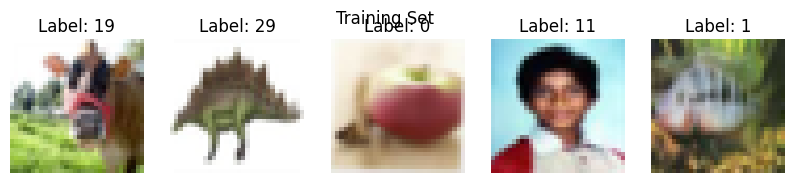

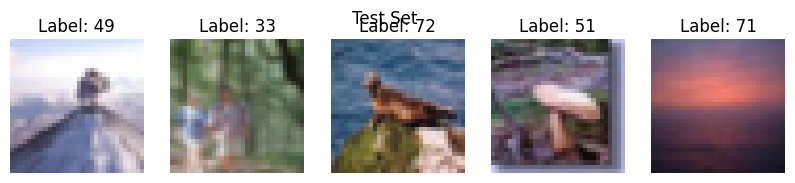

In [5]:
# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Randomly select 50 classes for Block 1
np.random.seed(42)  # For reproducibility
class_indices = np.random.choice(range(100), 50, replace=False)

# Find indices for Block 1 (train data)
block1_train_indices = np.where(np.isin(y_train, class_indices))[0]
block2_train_indices = np.where(~np.isin(y_train, class_indices))[0]

# Find indices for Block 1 (test data)
block1_test_indices = np.where(np.isin(y_test, class_indices))[0]
block2_test_indices = np.where(~np.isin(y_test, class_indices))[0]

# Prepare Block 1 and Block 2 datasets
x_train_block1, y_train_block1 = x_train[block1_train_indices], y_train[block1_train_indices]
x_train_block2, y_train_block2 = x_train[block2_train_indices], y_train[block2_train_indices]
x_test_block1, y_test_block1 = x_test[block1_test_indices], y_test[block1_test_indices]
x_test_block2, y_test_block2 = x_test[block2_test_indices], y_test[block2_test_indices]

# Split Block 1's training data into training and validation sets (80% train, 20% validation)
x_train_block1, x_val_block1, y_train_block1, y_val_block1 = train_test_split(
    x_train_block1, y_train_block1, test_size=0.2, random_state=42
)

# Split Block 2's training data into training and validation sets (80% train, 20% validation)
x_train_block2, x_val_block2, y_train_block2, y_val_block2 = train_test_split(
    x_train_block2, y_train_block2, test_size=0.2, random_state=42
)

# Remap labels for Block 1 to be in the range [0, 49]
class_to_new_label = {old_class: new_class for new_class, old_class in enumerate(class_indices)}
y_train_block1 = np.vectorize(class_to_new_label.get)(y_train_block1)
y_val_block1 = np.vectorize(class_to_new_label.get)(y_val_block1)
y_test_block1 = np.vectorize(class_to_new_label.get)(y_test_block1)

y_train_block2 = np.vectorize(class_to_new_label.get)(y_train_block2)
y_val_block2 = np.vectorize(class_to_new_label.get)(y_val_block2)
y_test_block2 = np.vectorize(class_to_new_label.get)(y_test_block2)

y_train_block1_one_hot = to_categorical(y_train_block1, num_classes=num_classes)
y_val_block1_one_hot = to_categorical(y_val_block1, num_classes=num_classes)
y_test_block1_one_hot = to_categorical(y_test_block1, num_classes=num_classes)

# Save data as .npz files
np.savez('block1_data.npz', x_train=x_train_block1, y_train=y_train_block1, x_val=x_val_block1, y_val=y_val_block1, x_test=x_test_block1, y_test=y_test_block1)
np.savez('block2_data.npz', x_train=x_train_block2, y_train=y_train_block2, x_val=x_val_block2, y_val=y_val_block2, x_test=x_test_block2, y_test=y_test_block2)

# Check the shapes of the datasets
print(f'Block 1 train shape: {x_train_block1.shape}, Block 1 val shape: {x_val_block1.shape}, Block 1 test shape: {x_test_block1.shape}')
print(f'Block 2 train shape: {x_train_block2.shape}, Block 2 test shape: {x_test_block2.shape}')


# Function to plot images
def plot_images(images, labels, title):
    plt.figure(figsize=(10, 2))
    for i in range(5):
        ax = plt.subplot(1, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i][0]}")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

# Plot 5 images from the training set
plot_images(x_train, y_train, "Training Set")

# Plot 5 images from the test set
plot_images(x_test, y_test, "Test Set")